# A simple Client Credit Rating Model (Data Exploration)

https://www.kaggle.com/datasets/satyajeetrai/credit-risk-dataset/data

Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

### Import Libraries

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load from BigQuery

In [14]:
from google.cloud import bigquery

# This works out of the box on Vertex AI Workbench
client = bigquery.Client()

# Run a query
query = """
SELECT * FROM `credit-risk-459910.CreditData.csv`
LIMIT 1001
"""
df = client.query(query).to_dataframe()
df.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account_bonds,Present employment_years_,Installment rate in percentage of disposable income,personal_status,Other debtors _ guarantors,...,Property,Age in years,Other installment plans _banks_stores_,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,634,9,existing paid,furniture/equipment,1980,<100,<1,2,female div/dep/mar,co applicant,...,car,19,none,rent,2,skilled,1,none,True,bad
1,156,12,existing paid,furniture/equipment,1282,<100,1<=X<4,2,female div/dep/mar,none,...,car,20,none,rent,1,skilled,1,none,True,bad
2,297,12,existing paid,used car,4675,no known savings,<1,1,female div/dep/mar,none,...,car,20,none,rent,1,skilled,1,none,True,good
3,411,24,existing paid,radio/tv,1967,<100,>=7,4,female div/dep/mar,none,...,car,20,none,own,1,skilled,1,yes,True,good
4,421,15,existing paid,new car,3186,>=1000,4<=X<7,2,female div/dep/mar,none,...,car,20,none,rent,1,skilled,1,none,True,good


### Show every column

In [15]:
print(list(df.columns))

['id', 'Duration in months', 'Credit history', 'Purpose of the credit', 'Credit amount', 'Status of savings account_bonds', 'Present employment_years_', 'Installment rate in percentage of disposable income', 'personal_status', 'Other debtors _ guarantors', 'Present residence since X years', 'Property', 'Age in years', 'Other installment plans _banks_stores_', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'Foreign worker', 'Status of existing checking account']


In [16]:
df.isna().sum()

id                                                          0
Duration in months                                          0
Credit history                                              0
Purpose of the credit                                       0
Credit amount                                               0
Status of savings account_bonds                             0
Present employment_years_                                   0
Installment rate in percentage of disposable income         0
personal_status                                             0
Other debtors _ guarantors                                  0
Present residence since X years                             0
Property                                                    0
Age in years                                                0
Other installment plans _banks_stores_                      0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

### Change categorical variables to numeric

#### Credit history

In [17]:
print(df['Credit history'].head(10))
print("\n", df['Credit history'].unique())

0    existing paid
1    existing paid
2    existing paid
3    existing paid
4    existing paid
5    existing paid
6    existing paid
7    existing paid
8    existing paid
9    existing paid
Name: Credit history, dtype: object

 ['existing paid' 'delayed previously' 'all paid'
 'critical/other existing credit' 'no credits/all paid']


In [18]:
mapping = {
    'critical/other existing credit': -2,
    'delayed previously': -1,
    'existing paid':1,
    'no credits/all paid': 2,
    'all paid': 5

}
df['Credit history'] = df['Credit history'].map(mapping)
print(df['Credit history'].head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Credit history, dtype: int64


#### *Purpose of the credit is is not ordinal data

#### Status of savings account/bonds

In [23]:
print(df['Status of savings account_bonds'].head(10))
print("\n", df['Status of savings account_bonds'].unique())

0                <100
1                <100
2    no known savings
3                <100
4              >=1000
5                <100
6    no known savings
7         500<=X<1000
8                <100
9                <100
Name: Status of savings account_bonds, dtype: object

 ['<100' 'no known savings' '>=1000' '500<=X<1000' '100<=X<500']


In [25]:
mapping = {
    'no known savings': -1,
    '<100': 0,
    '100<=X<500': 1,  
    '500<=X<1000': 2,
    '>=1000': 3
}
df['Status of savings account_bonds'] = df['Status of savings account_bonds'].map(mapping)
print(df['Status of savings account_bonds'].head(10))

0    0
1    0
2   -1
3    0
4    3
5    0
6   -1
7    2
8    0
9    0
Name: Status of savings account_bonds, dtype: int64


#### Present employment(years)

In [28]:
print(df['Present employment_years_'].head(10))
print("\n", df['Present employment_years_'].unique())

0        <1
1    1<=X<4
2        <1
3       >=7
4    4<=X<7
5       >=7
6    1<=X<4
7    1<=X<4
8    1<=X<4
9    1<=X<4
Name: Present employment_years_, dtype: object

 ['<1' '1<=X<4' '>=7' '4<=X<7' 'unemployed']


In [29]:
mapping = {
    'unemployed': -1,
    '<1': 0,
    '1<=X<4': 1,  
    '4<=X<7': 2,
    '>=7': 3
}
df['Present employment_years_'] = df['Present employment_years_'].map(mapping)
print(df['Present employment_years_'].head(10))

0    0
1    1
2    0
3    3
4    2
5    3
6    1
7    1
8    1
9    1
Name: Present employment_years_, dtype: int64


#### Personal status

In [30]:
print(df['personal_status'].head(10))
print("\n", df['personal_status'].unique())

0    female div/dep/mar
1    female div/dep/mar
2    female div/dep/mar
3    female div/dep/mar
4    female div/dep/mar
5           male single
6          male mar/wid
7    female div/dep/mar
8          male mar/wid
9          male mar/wid
Name: personal_status, dtype: object

 ['female div/dep/mar' 'male single' 'male mar/wid' 'male div/sep']


In [31]:
#Dropping collumn as it lacks diverse data.
df = df.drop(['personal_status'], axis=1)

#### Other debtors / guarantors	

In [32]:
print(df['Other debtors _ guarantors'].head(10))
print("\n", df['Other debtors _ guarantors'].unique())

0    co applicant
1            none
2            none
3            none
4            none
5            none
6            none
7            none
8            none
9            none
Name: Other debtors _ guarantors, dtype: object

 ['co applicant' 'none' 'guarantor']


In [33]:
# Grouping by yes or no
mapping = {
    'none': -1,
    'guarantor': 1,
    'co applicant': 1
}
df['Other debtors _ guarantors'] = df['Other debtors _ guarantors'].map(mapping)
print(df['Other debtors _ guarantors'].head(10))

0    1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: Other debtors _ guarantors, dtype: int64


#### Property

In [34]:
print(df['Property'].head(10))
print("\n", df['Property'].unique())

0    car
1    car
2    car
3    car
4    car
5    car
6    car
7    car
8    car
9    car
Name: Property, dtype: object

 ['car' 'life insurance' 'no known property' 'real estate']


In [35]:
# Since they are mutually exclussive i choose "life insurance" above "car"
mapping = {
    'no known property': -1,
    'car': 1,
    'life insurance': 2,
    'real estate': 3
}
df['Property'] = df['Property'].map(mapping)
print(df['Property'].head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Property, dtype: int64


#### Other installment plans (banks/stores)

In [37]:
print(df['Other installment plans _banks_stores_'].head(10))
print("\n", df['Other installment plans _banks_stores_'].unique())

0      none
1      none
2      none
3      none
4      none
5      none
6      none
7      none
8    stores
9      none
Name: Other installment plans _banks_stores_, dtype: object

 ['none' 'stores' 'bank']


In [38]:
# We will gouup the to yes and no
mapping = {
    'none': -1,
    'bank': 1,
    'stores': 1
}
df['Other installment plans _banks_stores_'] = df['Other installment plans _banks_stores_'].map(mapping)
print(df['Other installment plans _banks_stores_'].head(10))

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8    1
9   -1
Name: Other installment plans _banks_stores_, dtype: int64


#### Housing

In [39]:
print(df['Housing'].head(10))
print("\n", df['Housing'].unique())

0    rent
1    rent
2    rent
3     own
4    rent
5     own
6     own
7    rent
8     own
9    rent
Name: Housing, dtype: object

 ['rent' 'own' 'for free']


In [40]:
mapping = {
    'rent': -2,
    'for free': -1,
    'own': 5
}
df['Housing'] = df['Housing'].map(mapping)
print(df['Housing'].head(10))

0   -2
1   -2
2   -2
3    5
4   -2
5    5
6    5
7   -2
8    5
9   -2
Name: Housing, dtype: int64


#### Status of existing checking account

In [41]:
print(df['Status of existing checking account'].head(10))
print("\n", df['Status of existing checking account'].unique())

0     bad
1     bad
2    good
3    good
4    good
5    good
6     bad
7    good
8    good
9    good
Name: Status of existing checking account, dtype: object

 ['bad' 'good']


In [42]:
mapping = {
    'bad': -1,
    'good': 1
}
df['Status of existing checking account'] = df['Status of existing checking account'].map(mapping)
print(df['Status of existing checking account'].head(10))

0   -1
1   -1
2    1
3    1
4    1
5    1
6   -1
7    1
8    1
9    1
Name: Status of existing checking account, dtype: int64


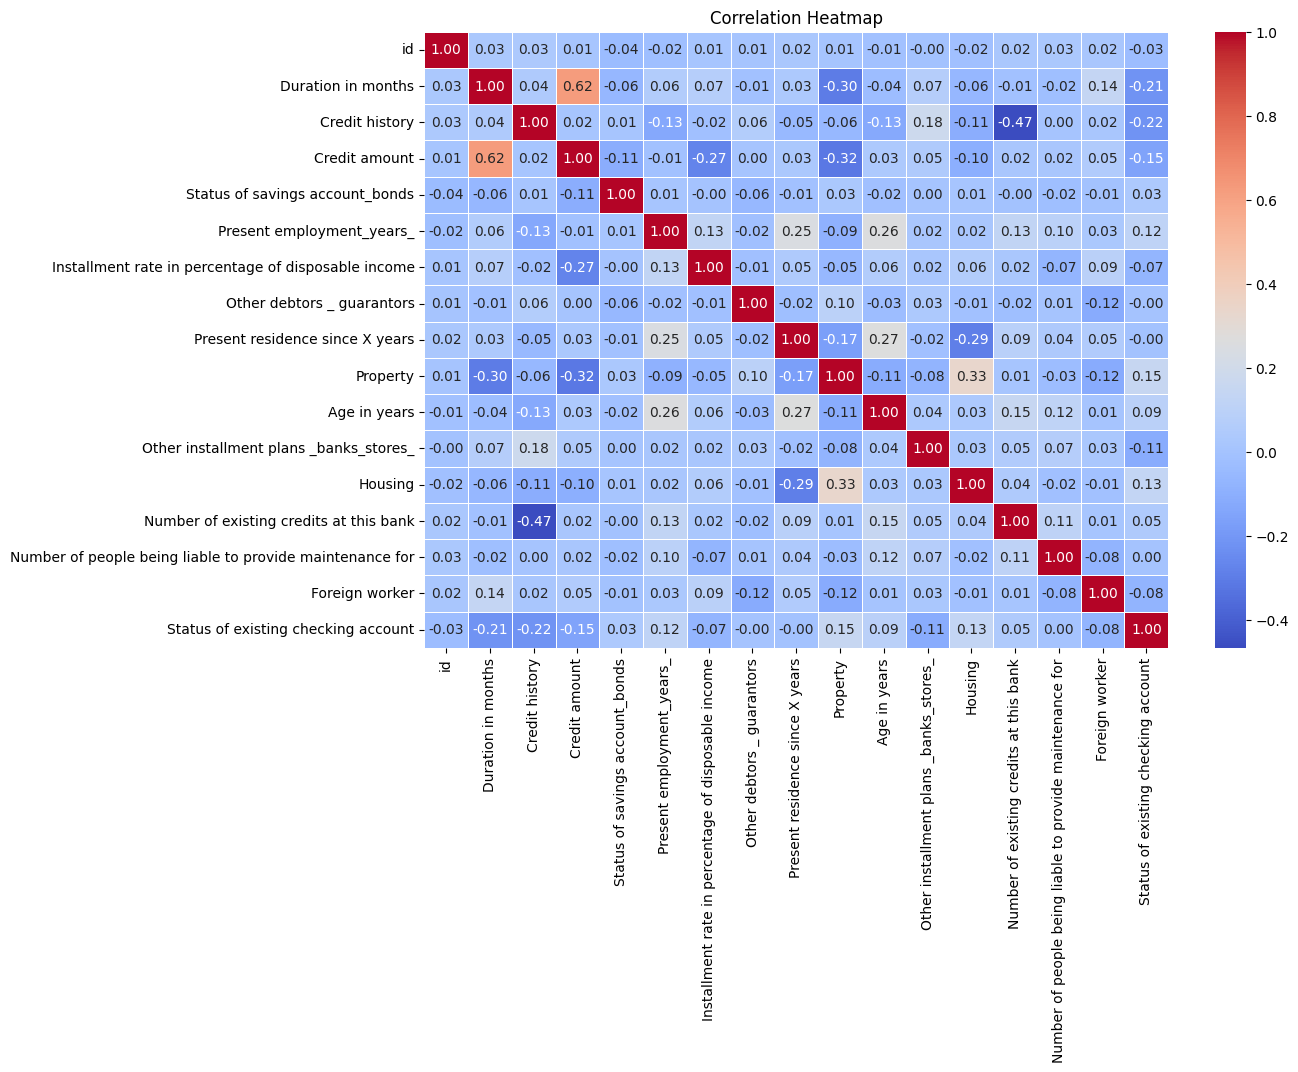

In [43]:
corr = df.corr(numeric_only=True)  # Get correlation of numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Our data quantification might not be completetly accurate but do reveal correlations

#### Connections that we will use when we select predictive variables